<a href="https://colab.research.google.com/github/zhihaohong52/bc3415/blob/main/loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/BC3415/Loan Default II (Employed).csv')

In [4]:
df.head(10)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
5,6,0,11035.08,89898.72,0
6,7,1,9906.12,298862.76,0
7,8,0,9704.04,211205.40,0
8,9,1,13932.72,449622.36,0
9,10,1,0.00,351303.24,0


In [5]:
# Check for nulls
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [6]:
# Describe the data
df.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [7]:
# Convert 'Employed' to dummy variables and drop 'Index'
df = df.drop('Index', axis = 1)
df = pd.get_dummies(df, columns=['Employed'], drop_first=True)

In [8]:
df.head(10)

,Bank Balance,Annual Salary,Defaulted?,Employed_1
0,8754.36,532339.56,0,True
1,9806.16,145273.56,0,False
2,12882.60,381205.68,0,True
3,6351.00,428453.88,0,True
4,9427.92,461562.00,0,True
5,11035.08,89898.72,0,False
6,9906.12,298862.76,0,True
7,9704.04,211205.40,0,False
8,13932.72,449622.36,0,True
9,0.00,351303.24,0,True


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

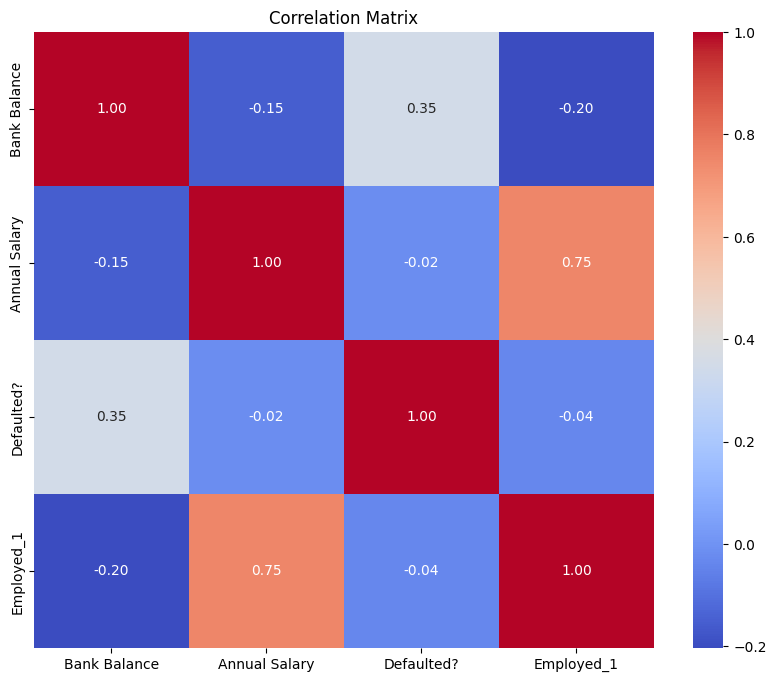

In [10]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

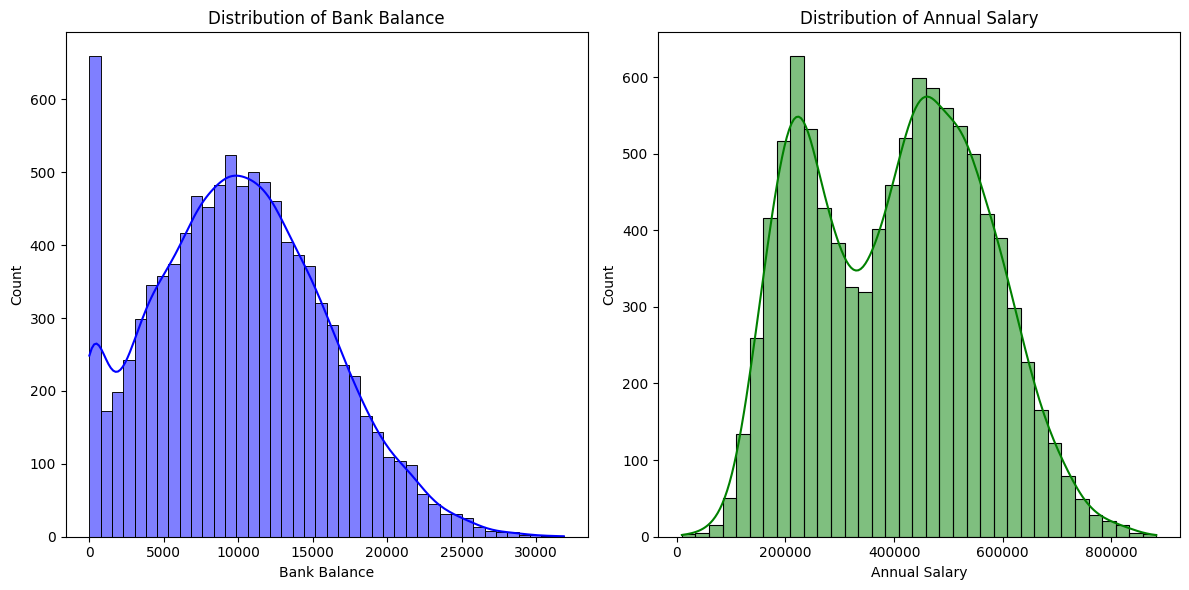

In [11]:
# Distribution plots for numerical variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Bank Balance'], kde=True, color='blue')
plt.title('Distribution of Bank Balance')

plt.subplot(1, 2, 2)
sns.histplot(df['Annual Salary'], kde=True, color='green')
plt.title('Distribution of Annual Salary')

plt.tight_layout()
plt.show()

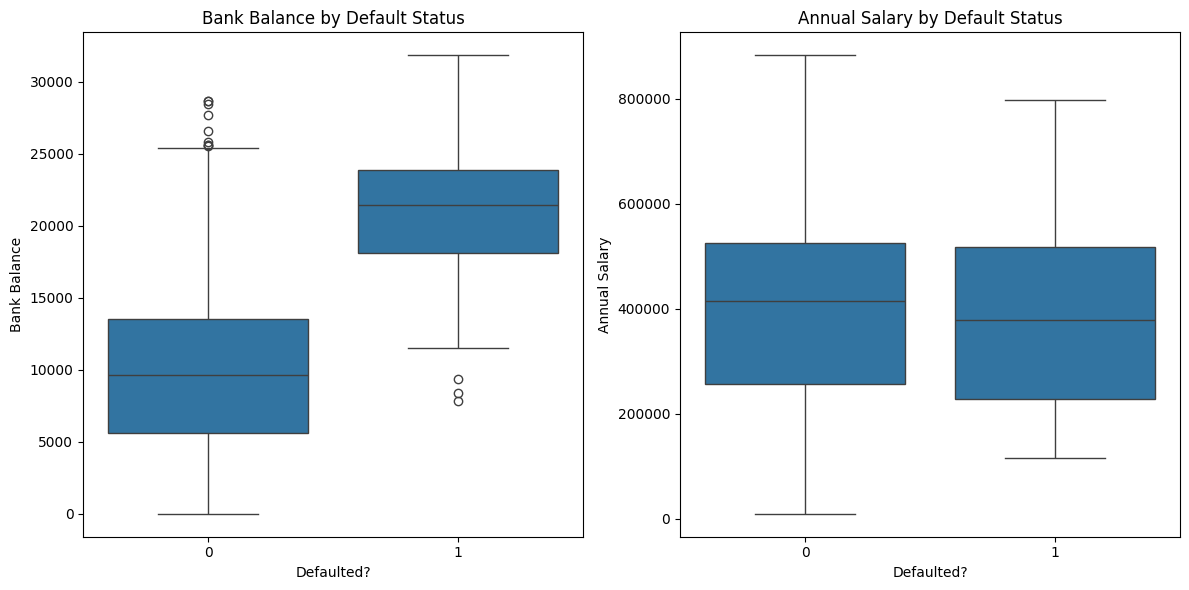

In [12]:
# Box plots to check for outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Defaulted?', y='Bank Balance', data=df)
plt.title('Bank Balance by Default Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='Defaulted?', y='Annual Salary', data=df)
plt.title('Annual Salary by Default Status')

plt.tight_layout()
plt.show()

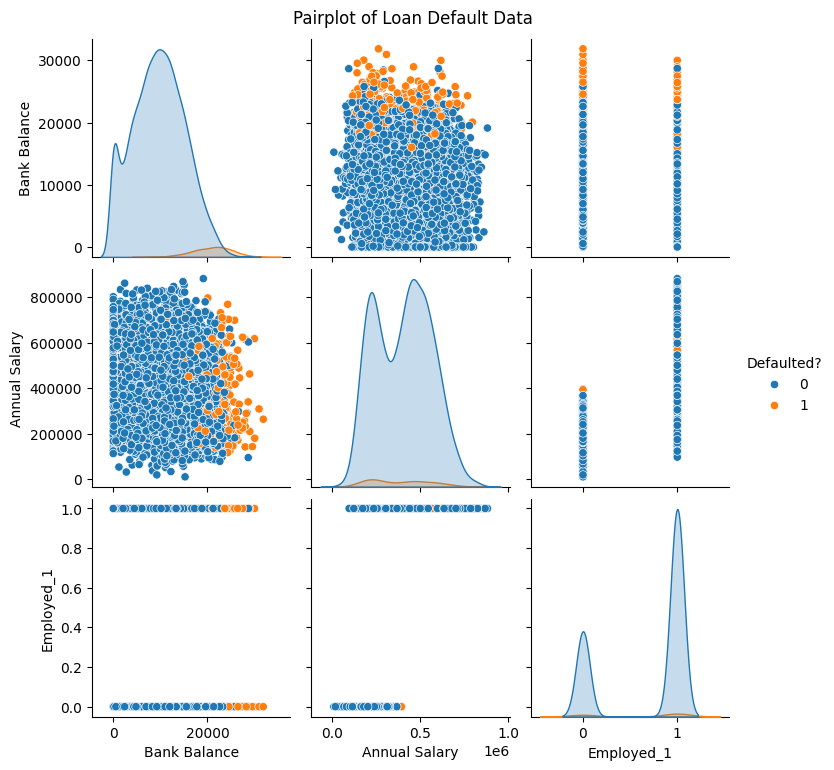

In [13]:
# Pairplot for visualising relationships
sns.pairplot(df, hue='Defaulted?', diag_kind='kde')
plt.suptitle('Pairplot of Loan Default Data', y=1.02)
plt.show()

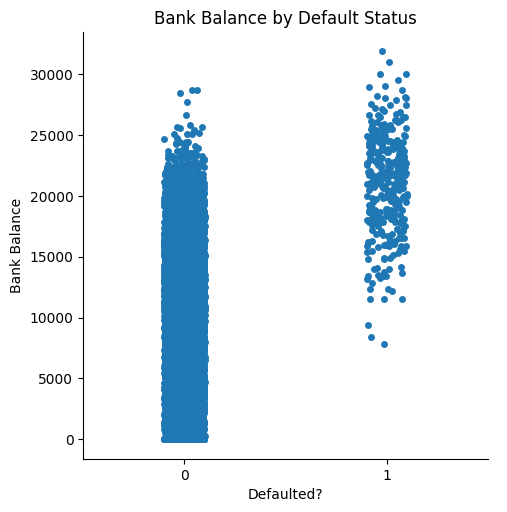

In [14]:
# Catplot of bank balance and defaulted
sns.catplot(data=df, x='Defaulted?', y="Bank Balance")
plt.title('Bank Balance by Default Status')
plt.show()

In [15]:
# Split into feature and target
X = df.drop('Defaulted?', axis=1)
y = df['Defaulted?']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from scipy import stats

In [19]:
# Z score standardization for bank balance
X_train['Bank Balance'] = stats.zscore(X_train['Bank Balance'])
X_test['Bank Balance'] = stats.zscore(X_test['Bank Balance'])

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import linear_model, tree, ensemble, neural_network

In [21]:
model = linear_model.LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9655
[[1931    0]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1931
           1       0.00      0.00      0.00        69

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
model2 = tree.DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

0.9585
[[1888   43]
 [  40   29]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1931
           1       0.40      0.42      0.41        69

    accuracy                           0.96      2000
   macro avg       0.69      0.70      0.69      2000
weighted avg       0.96      0.96      0.96      2000



In [23]:
model3 = ensemble.RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

0.965
[[1910   21]
 [  49   20]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.49      0.29      0.36        69

    accuracy                           0.96      2000
   macro avg       0.73      0.64      0.67      2000
weighted avg       0.96      0.96      0.96      2000



In [24]:
model4 = ensemble.GradientBoostingClassifier()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

0.9655
[[1909   22]
 [  47   22]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1931
           1       0.50      0.32      0.39        69

    accuracy                           0.97      2000
   macro avg       0.74      0.65      0.69      2000
weighted avg       0.96      0.97      0.96      2000



In [25]:
model5 = neural_network.MLPClassifier()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(accuracy_score(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

0.9655
[[1931    0]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1931
           1       0.00      0.00      0.00        69

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
